<a href="https://colab.research.google.com/github/cwattsnogueira/rating-predictor-spam-detection-review-summarizer/blob/main/08_02_01_ClusteringPipeline_KMeans_ElbowMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
#  Load dataset
df = pd.read_parquet("/content/engineered_features.parquet")
print("Loaded:", df.shape)

Loaded: (9480, 47)


In [ ]:
#  Select features for clustering (no target)
features = [
    'review_length', 'sentiment_polarity', 'repetition_score',
    'semantic_mismatch_score', 'product_name_match_flag',
    'unrelated_product_flag', 'username_dup_flag'
]

X = df[features].fillna(0)

In [ ]:
#  Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

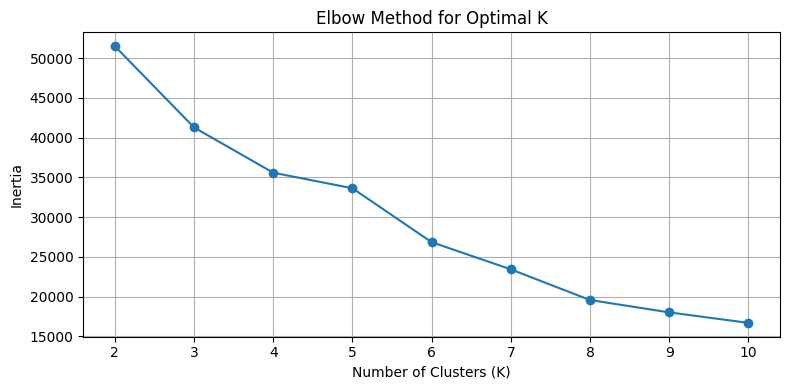

In [ ]:
#  Elbow method to find optimal clusters
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#  Fit final KMeans model
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

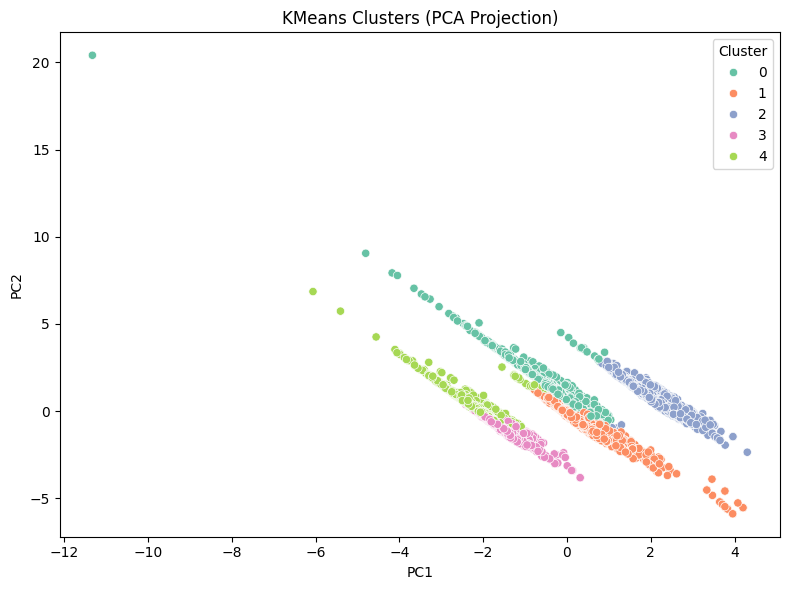

In [ ]:
#  Visualize clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
#  Export clustered dataset
df.to_parquet("/content/review_clusters.parquet", index=False)